### Laptop price predictor 

Objective is to build a machine learning model to predict the price of the laptop based on the features

In [1]:
#Importing packages and libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#analysing the data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.shape

(1303, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
#Observations 
##There are 12 coulumns and 1303 observation
#there is no null values and duplicate values in the data set 
#there is a coulum unnamed which can be deleted
#Only two columns have int / float values remaining are object 

### Feature engineering and EDA

In [10]:
#dropping Unnamed column

In [11]:
df = df.drop('Unnamed: 0',axis=1)

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
#Converting Ram nd Weight to int/ float by removing GB and weignt

In [14]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [15]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [16]:
df['Ram'] = df['Ram'].apply(lambda x :x[:-2]).astype(int)
df['Weight'] = df['Weight'].apply(lambda x :x[:-2]).astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

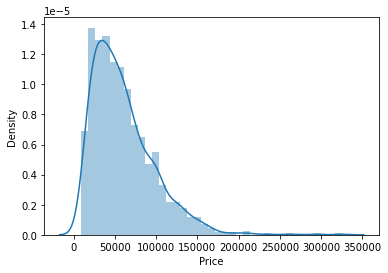

In [18]:
sns.distplot(df['Price'])

In [19]:
#There are laptps with higher prices but they are in fewer quantity

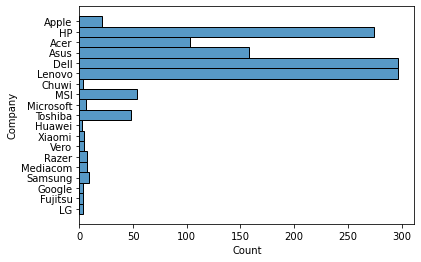

In [20]:
sns.histplot(y=df['Company'])
plt.show()

In [21]:
#HP , Lenevo and Dell having maximum number of models 

<AxesSubplot:xlabel='Price', ylabel='Company'>

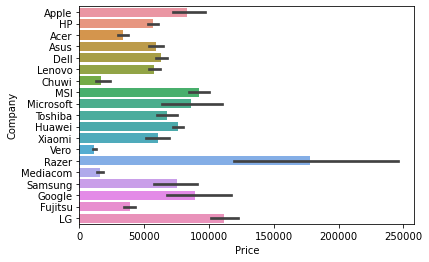

In [22]:
sns.barplot(x =df['Price'],y = df['Company'])

In [23]:
#Price is higher for Razer model
#follows apple MSI and LG

<AxesSubplot:>

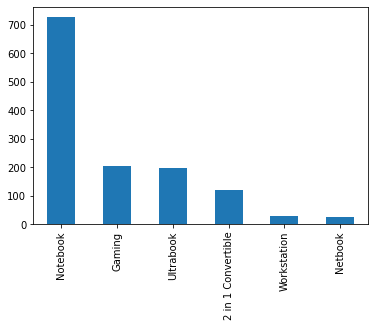

In [24]:
df['TypeName'].value_counts().plot(kind = 'bar')

In [25]:
#Note book category have highest number of models 

<AxesSubplot:xlabel='Price', ylabel='TypeName'>

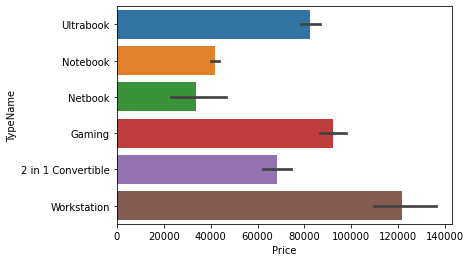

In [26]:
sns.barplot(x =df['Price'],y = df['TypeName'])

In [27]:
#Workstations costs more and gaming laptops follows

<AxesSubplot:xlabel='Inches', ylabel='Density'>

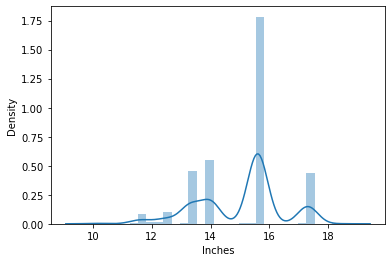

In [28]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

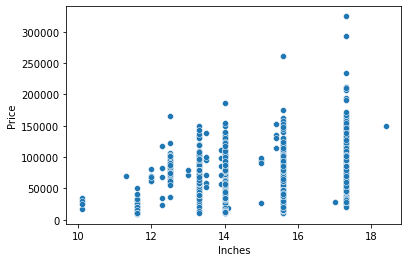

In [29]:
sns.scatterplot(x = df['Inches'],y = df['Price'])

In [30]:
#In general as the screen size increases the price also increasing 

In [31]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [32]:
# inserting a new column using Screen resolution column ie with (1) or without (0) touch screen
# inserting a new column using Screen resolution column ie with (1) or without (0) IPS Display

In [33]:
df['Touch screen']  = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

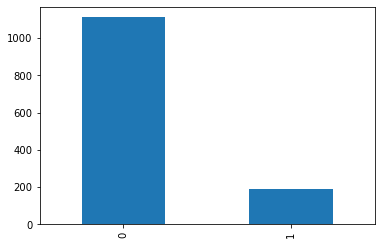

In [34]:
df['Touch screen'].value_counts().plot(kind ='bar')

<AxesSubplot:xlabel='Touch screen', ylabel='Price'>

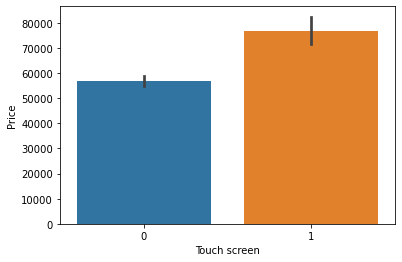

In [35]:
sns.barplot(x = df['Touch screen'],y = df['Price'])

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [37]:
df['IPS']  = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

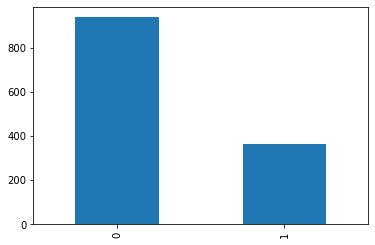

In [39]:
df['IPS'].value_counts().plot(kind ='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

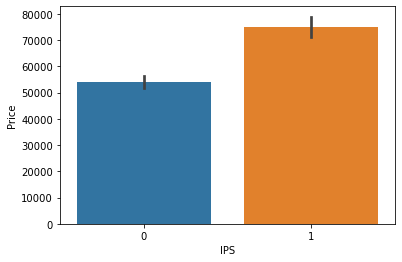

In [40]:
sns.barplot(x = df['IPS'],y = df['Price'])

In [41]:
#Taking X resolution and y rsolution from ScreenResolution
df['X_res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[0])
df['Y_res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[1])

In [42]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touch screen      1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [44]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [45]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch screen    0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
Name: Price, dtype: float64

In [46]:
#Introducing new column pixels per inches (PPI)

In [47]:
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [49]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch screen    0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
ppi             0.473487
Name: Price, dtype: float64

In [50]:
#So now screen resolution column can be droped 

In [51]:
df.drop(columns='ScreenResolution',inplace=True,axis =1)

In [52]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [53]:
# As we are already devived ppi , we could drop inches , X_res, Y_res

In [54]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [56]:
#Next to Cpu column 

In [57]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [58]:
df['cpu name'] = df['Cpu'].apply(lambda x : x.split()[0:3])

In [59]:
df['cpu name'] = df['cpu name'].apply(lambda x : (' ').join(x))

In [60]:
df['cpu name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [61]:
def fetc_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'AMD Processor'

In [62]:
df['CPU brand'] = df['cpu name'].apply(fetc_processor)

In [63]:
df['CPU brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other intel processor'], dtype=object)

<AxesSubplot:>

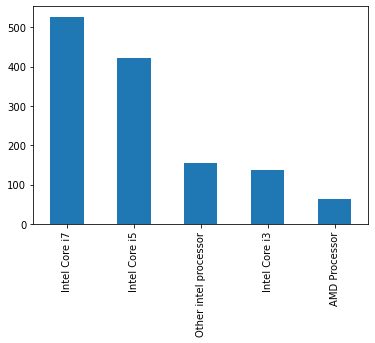

In [64]:
df['CPU brand'].value_counts().plot(kind = 'bar')

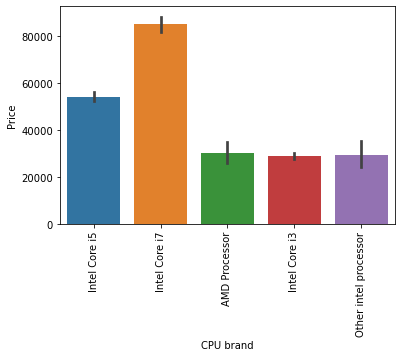

In [65]:
sns.barplot(x = df['CPU brand'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [66]:
#Maximum number laptops cums with intel i7 processor 
#Inter i7 process laptps have maximum price around (80k) follows Intel i5 , Rest of the processors 
#have almost same price whic is around 30k

In [67]:
#Now we can drop Cpu and cpu name column

In [68]:
df.drop(columns=['Cpu','cpu name'],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

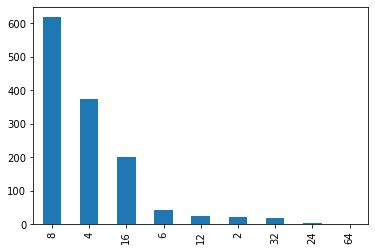

In [70]:
df['Ram'].value_counts().plot(kind='bar')

In [71]:
#Maximum laptops have 8GB ram

<AxesSubplot:xlabel='Ram', ylabel='Price'>

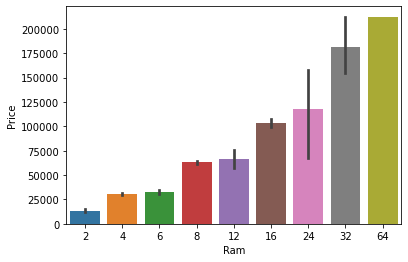

In [72]:
sns.barplot(x = df['Ram'],y = df['Price'])

In [73]:
#As ram increases the price alos increase, Good co relation

In [74]:
#Memory converting to four coulumns  with respective memory values, Coulumns are SSD, HDD, Hybrid and Flash storage

In [75]:
df['Memory'] = df['Memory'].str.replace('1.0TB','1TB')

In [76]:
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
df['new'] = df['Memory'].apply (lambda x : x+ '+ 0' if '+' not in x else x) 
df['new'] = df['new'].str.split('+')
df['first'] = df['new'].apply(lambda x : x[0])
df['second'] = df['new'].apply(lambda x : x[1])

In [77]:
df['SSD_1'] = df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['HDD_1'] = df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['Flash Storage_1'] = df['first'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['Hybrid_1'] = df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)

df['SSD_2'] = df['second'].apply(lambda x : 1 if 'SSD' in x else 0)
df['HDD_2'] = df['second'].apply(lambda x : 1 if 'HDD' in x else 0)
df['Flash Storage_2'] = df['second'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['Hybrid_2'] = df['second'].apply(lambda x : 1 if 'Hybrid' in x else 0)


In [78]:
df['first_value'] = df['first'].apply(lambda x : x.split()[0]) 
df['first_value'] = df['first_value'].astype('int')

In [79]:
df['second_value'] = df['second'].apply(lambda x : x.split()[0]) 
df['second_value'] = df['second_value'].astype('int')

In [80]:
df['SSD'] = (df['first_value']*df['SSD_1']+df['second_value']*df['SSD_2'])
df['HDD'] = (df['first_value']*df['HDD_1']+df['second_value']*df['HDD_2'])
df['Flash Storage'] = (df['first_value']*df['Flash Storage_1']+df['second_value']*df['Flash Storage_2'])
df['Hybrid'] = (df['first_value']*df['Hybrid_1']+df['second_value']*df['Hybrid_1'])

df.drop(columns=['new', 'first',
       'second', 'SSD_1', 'HDD_1', 'Flash Storage_1', 'Hybrid_1', 'SSD_2',
       'HDD_2', 'Flash Storage_2', 'Hybrid_2', 'first_value', 'second_value'],inplace=True)

In [81]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand,SSD,HDD,Flash Storage,Hybrid
45,Apple,Ultrabook,8,256 SSD,Intel Iris Graphics 540,macOS,1.37,75604.3200,0,1,226.983005,Intel Core i5,256,0,0,0
59,Asus,Notebook,4,256 SSD,Intel HD Graphics 520,Linux,2.00,22111.2000,0,0,141.211998,Intel Core i3,256,0,0,0
687,Dell,Notebook,4,1000 HDD,AMD Radeon R5 M430,Windows 10,2.20,29073.2976,0,0,100.454670,Intel Core i3,0,1000,0,0
1108,HP,Notebook,4,1000 HDD,AMD Radeon R4,Windows 10,2.10,21205.4400,0,0,141.211998,AMD Processor,0,1000,0,0
686,HP,Notebook,4,500 HDD,AMD Radeon 520,Windows 10,1.86,32639.8608,0,0,100.454670,Intel Core i5,0,500,0,0
579,Dell,Notebook,8,256 SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0,141.211998,Intel Core i7,256,0,0,0
1242,Acer,Notebook,4,500 HDD,Intel HD Graphics 520,Linux,2.40,19276.7040,0,0,100.454670,Intel Core i3,0,500,0,0
936,Dell,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,2.18,29762.2080,0,0,100.454670,Intel Core i3,0,1000,0,0
1294,HP,Notebook,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,0,1000
230,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0,100.454670,Intel Core i3,0,1000,0,0


In [82]:
df.drop('Memory',inplace=True,axis =1)

In [83]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touch screen     0.191226
IPS              0.252208
ppi              0.473487
SSD              0.670799
HDD             -0.096441
Flash Storage   -0.040511
Hybrid          -0.040147
Name: Price, dtype: float64

In [84]:
#As Hybrid and Flash storage have very weak corelation with Price we are droping both 

In [85]:
df.drop(columns=['Flash Storage','Hybrid'],inplace=True)

In [86]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [87]:
#Gpu For gpu we will consider only  the company name that is the firt word 

In [88]:
df['Gpu name'] = df['Gpu'].apply(lambda x : x.split()[0])

In [89]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand,SSD,HDD,Gpu name
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [90]:
df['Gpu name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu name, dtype: int64

In [91]:
#There is onlu one processor from ARM whic can be droped 

In [92]:
df = df[df['Gpu name'] != 'ARM']

<AxesSubplot:>

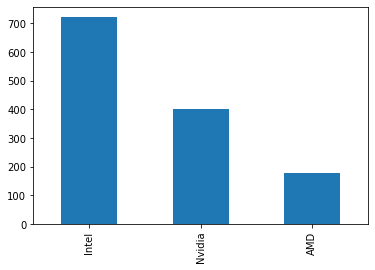

In [93]:
df['Gpu name'].value_counts().plot(kind='bar')

In [94]:
#Maximum laptop is with graphics card Intel

<AxesSubplot:xlabel='Gpu name', ylabel='Price'>

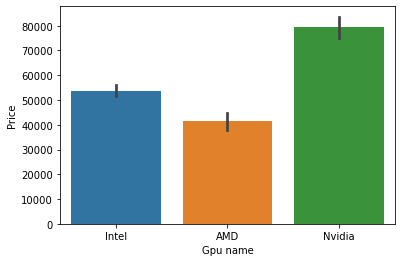

In [95]:
sns.barplot(x = df['Gpu name'],y = df['Price'])

In [96]:
#Laptops with Nvidia graphics card has maximum price 

In [97]:
#Now we can drop GPU original coloumn

In [98]:
df.drop(columns=['Gpu'],inplace=True)

In [99]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand,SSD,HDD,Gpu name
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [100]:
# Checking operating system 

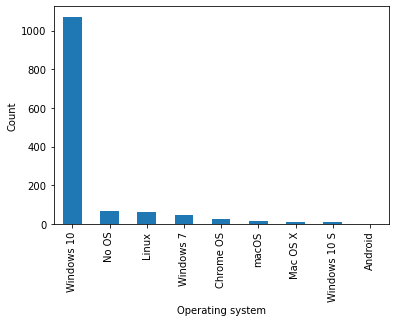

In [101]:
df['OpSys'].value_counts().plot(kind = 'bar')
plt.xlabel('Operating system')
plt.ylabel('Count')
plt.show()

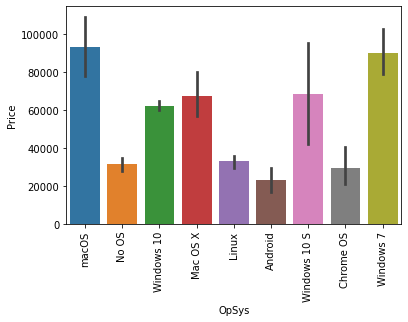

In [102]:
sns.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [103]:
#Maximum number of laptops are coming with windows software 
#Mac Os and Windows os have maximum price

# The windows are mac od for the two catogories and others added as separate

In [104]:
def os_cat(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [105]:
df['OS'] = df['OpSys'].apply(os_cat)

In [106]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch screen,IPS,ppi,CPU brand,SSD,HDD,Gpu name,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [107]:
df.drop(columns=['OpSys'],inplace=True)

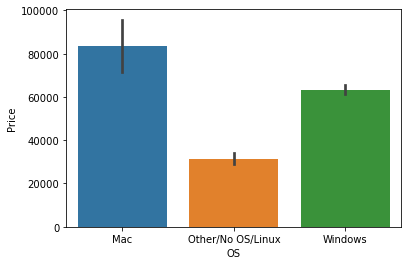

In [108]:
sns.barplot(x = df['OS'],y = df['Price'])

plt.show()

In [109]:
# Weight

<AxesSubplot:xlabel='Weight', ylabel='Density'>

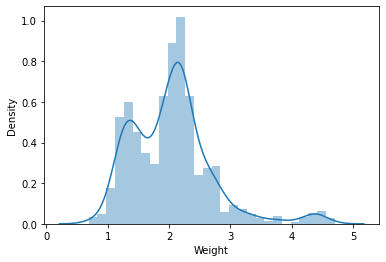

In [110]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

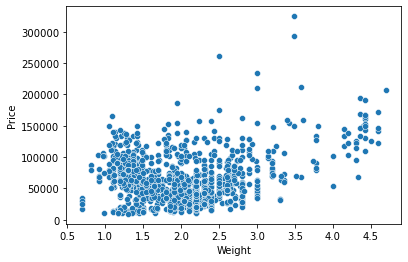

In [111]:
sns.scatterplot(x = df['Weight'],y=df['Price'])

In [112]:
#There is a slight linear relationship between weight and price

In [113]:
#Checking corelation between the varaible 

<AxesSubplot:>

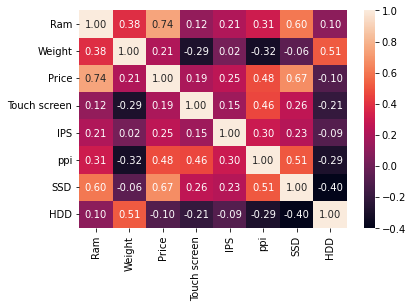

In [114]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [115]:
#Checking the target column

<AxesSubplot:xlabel='Price', ylabel='Density'>

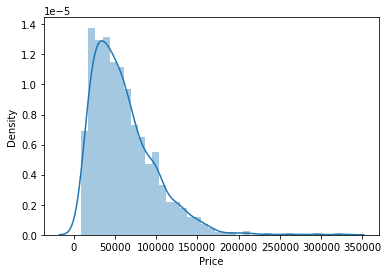

In [116]:
sns.distplot(df['Price'])

In [117]:
#It is skewed to left, when appling log transformation it is showing better distribution

<AxesSubplot:xlabel='Price', ylabel='Density'>

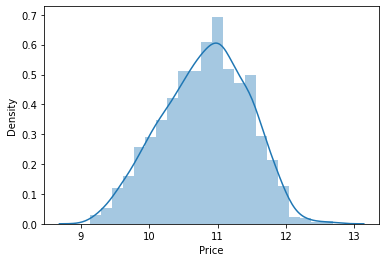

In [118]:
sns.distplot(np.log(df['Price']))

### data splitting and model building

In [119]:
X =df.drop(columns=['Price'],axis=1)
y = np.log(df['Price'])

In [120]:
X.shape

(1302, 12)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.15)

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [124]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [125]:
!pip install xgboost

In [126]:
#Linear regression
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8073277450155125
MAE 0.21017827953019


In [130]:
#Lasso regression
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8071852560353099
MAE 0.21114367856867822


In [129]:
#Ridge regression
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8127331033739459
MAE 0.20926802210371442


In [131]:
#KNN
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.80215040816626
MAE 0.19323579887267534


In [132]:
#Decision Tree
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8480701847782568
MAE 0.17901090967757965


In [133]:
#SVM
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8083168388444066
MAE 0.202394005678486


In [134]:
#Random forest
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8817511497669392
MAE 0.16181733920574043


In [135]:
#Adaboost
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=16,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.793699173955073
MAE 0.23064058246467742


In [136]:
#XG boost
step1 = ColumnTransformer(transformers=[
    ('col_tr',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','CPU brand','Gpu name','OS'])
     
],remainder='passthrough')

step2 = XGBRegressor(n_estimators =45,max_depth  =5, learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

r2 score is 0.8811773435850243
MAE 0.16496203512600974


In [ ]:
#Conculsion

#We could proceed with Random forest regressor as it is giving best results 
#The acurcy score of 88%